In [9]:
from pycocotools.coco import COCO
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

%matplotlib inline

In [2]:
datapath = Path.cwd()/'data'

testtype = 'val2014'
instances = datapath/'annotations'/f'instances_{testtype}.json'
captions = datapath/'annotations'/f'captions_{testtype}.json'

coco_instances = COCO(instances)
coco_captions = COCO(captions)


loading annotations into memory...
Done (t=6.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


In [3]:
dir(coco_instances)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'annToMask',
 'annToRLE',
 'anns',
 'catToImgs',
 'cats',
 'createIndex',
 'dataset',
 'download',
 'getAnnIds',
 'getCatIds',
 'getImgIds',
 'imgToAnns',
 'imgs',
 'info',
 'loadAnns',
 'loadCats',
 'loadImgs',
 'loadNumpyAnnotations',
 'loadRes',
 'showAnns']

In [4]:
ids = list(coco_instances.anns.keys())

In [6]:
annotation_id = np.random.choice(ids)
image_id = coco_instances.anns[annotation_id]['image_id']
image = coco_instances.loadImgs(image_id)[0]
image_url = image['coco_url']

print(image_url)

http://images.cocodataset.org/val2014/COCO_val2014_000000250301.jpg


A group of people carrying surfboards on top of a beach.
Group of adults and children carry water equipment into the ocean.
Adult and child surfers are along the ocean shore.
Some boys with surfboards and wetsuits are on the beach with two adults.
Some people are carrying a surfboard at the beach.


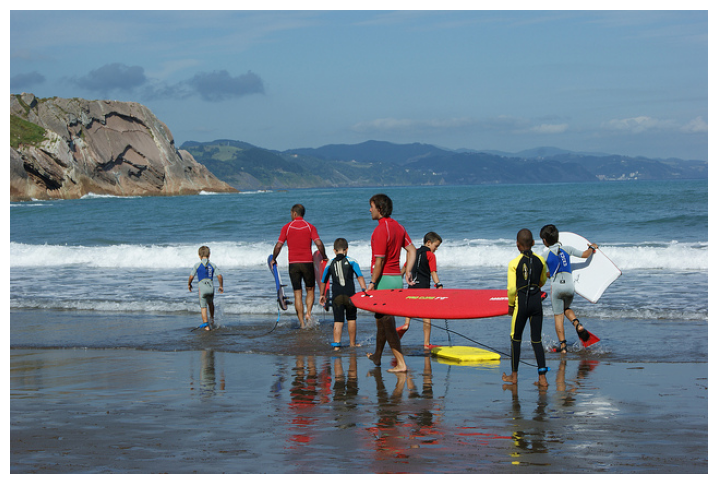

In [12]:
annotation_ids = coco_captions.getAnnIds(imgIds=image['id'])
annotations = coco_captions.loadAnns(annotation_ids)
coco_captions.showAnns(annotations)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))

ax.imshow(io.imread(image_url))
ax.axis('off')

plt.show()
